In [7]:
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker

from matplotlib.colors import LogNorm

from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import EngFormatter

from __future__ import print_function
import scipy.io.wavfile as wavfile
import scipy
from scipy import signal
from scipy.signal import convolve
import scipy.fftpack
from scipy.fft import fft, ifft, fftfreq
from scipy.fftpack import rfft, irfft

from obspy.core import UTCDateTime
from obspy.clients.fdsn import Client
from obspy import read
from obspy.core import read
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
import obspy.signal
import math

import os
from os.path import join

Llamamos a la carpeta con los datos
añadimos la meta-data de la traza
Duración del tiempo de la traza
Estación : GO03 (ej)
Graficar de muestras a segundo (Amplitud vs Tiempo)
Graficar Espectrograma


    

In [44]:
direccion_archivo = 'CO02_HHE.sac'
lol = read(direccion_archivo, debug_headers = True)
lolo=lol[0]

In [60]:
horas_chile = (lol[0].stats.endtime - lol[0].stats.starttime)/60
print('El archivo SAC leído tiene una duración de %d minutos' % (horas_chile))

El archivo SAC leído tiene una duración de 5 minutos


In [56]:
lolo.stats

         network: C1
         station: CO02
        location: 
         channel: HHE
       starttime: 2017-06-12T02:43:06.000000Z
         endtime: 2017-06-12T02:48:06.000000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 30001
           calib: 1.0
         _format: SAC
             sac: AttribDict({'delta': 0.01, 'depmin': -3827223.0, 'depmax': 9846835.0, 'scale': 1.0, 'odelta': -12345.0, 'b': 0.0, 'e': 300.0, 'o': -12345.0, 'a': -12345.0, 'internal0': -12345.0, 't0': -12345.0, 't1': -12345.0, 't2': -12345.0, 't3': -12345.0, 't4': -12345.0, 't5': -12345.0, 't6': -12345.0, 't7': -12345.0, 't8': -12345.0, 't9': -12345.0, 'f': -12345.0, 'resp0': -12345.0, 'resp1': -12345.0, 'resp2': -12345.0, 'resp3': -12345.0, 'resp4': -12345.0, 'resp5': -12345.0, 'resp6': -12345.0, 'resp7': -12345.0, 'resp8': -12345.0, 'resp9': -12345.0, 'stla': -12345.0, 'stlo': -12345.0, 'stel': -12345.0, 'stdp': -12345.0, 'evla': -12345.0, 'evlo': -12345.0, 'evel': -12345.0, 'evdp': -12345.0, 'm

In [54]:
lol[0].stats.sac['depmin']

-3827223.0

In [41]:
dir_PB06_HHZ = 'PB06_HHZ.sac'
PB06_HHZ  = read(dir_PB06_HHZ, debug_headers = True)

In [42]:
PB06_HHZ[0].__dict__

{'stats':          network: CX
         station: PB06
        location: 
         channel: HHZ
       starttime: 2017-06-12T02:44:05.998393Z
         endtime: 2017-06-12T02:51:05.998393Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 42001
           calib: 1.0
         _format: SAC
             sac: AttribDict({'delta': 0.01, 'depmin': -63249.0, 'depmax': 73142.0, 'scale': 1.0, 'odelta': -12345.0, 'b': 0.000393, 'e': 420.0004, 'o': -12345.0, 'a': -12345.0, 'internal0': -12345.0, 't0': -12345.0, 't1': -12345.0, 't2': -12345.0, 't3': -12345.0, 't4': -12345.0, 't5': -12345.0, 't6': -12345.0, 't7': -12345.0, 't8': -12345.0, 't9': -12345.0, 'f': -12345.0, 'resp0': -12345.0, 'resp1': -12345.0, 'resp2': -12345.0, 'resp3': -12345.0, 'resp4': -12345.0, 'resp5': -12345.0, 'resp6': -12345.0, 'resp7': -12345.0, 'resp8': -12345.0, 'resp9': -12345.0, 'stla': -12345.0, 'stlo': -12345.0, 'stel': -12345.0, 'stdp': -12345.0, 'evla': -31.5027, 'evlo': -71.7476, 'evel': -12345.0, 'evdp'

<IPython.core.display.Javascript object>


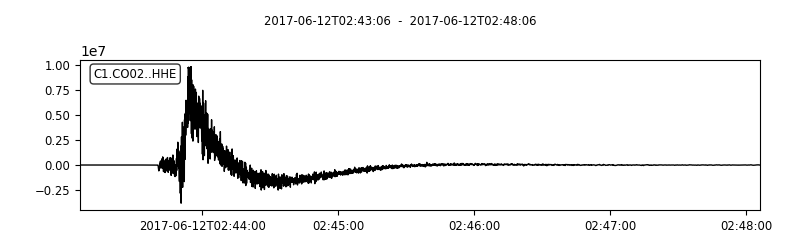

In [35]:
lol.plot();

<IPython.core.display.Javascript object>


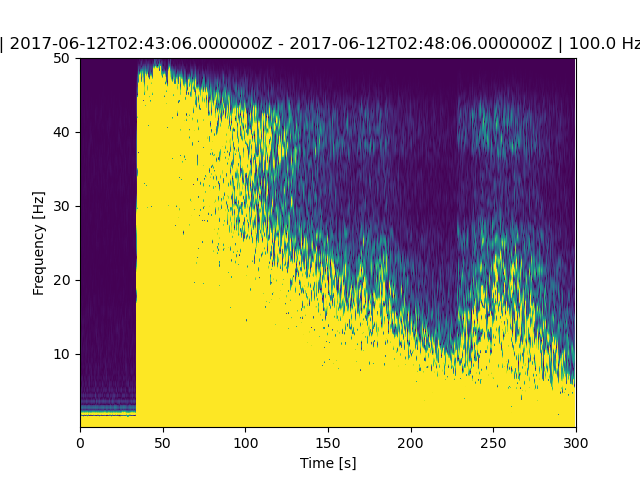

(2.535264603980174e-05, 10458764.338675702)


In [57]:
fig = lolo.spectrogram(show=False)
ax  = fig.axes[0]
im  = ax.images[0]
print(im.get_clim())
im.set_clim(vmax = 100)
plt.show()

# Estación: CO02

## Direcciones de los archivos N, E, Z

In [59]:
dir_CO02_HHE = 'CO02_HHE.sac'
CO02_HHE  = read(dir_CO02_HHE, debug_headers = True)

dir_CO02_HHN = 'CO02_HHN.sac'
CO02_HHN  = read(dir_CO02_HHN, debug_headers = True)

dir_CO02_HHZ = 'CO02_HHZ.sac'
CO02_HHZ  = read(dir_CO02_HHZ, debug_headers = True)

In [74]:
print('Fecha de inicio:')
print(CO02_HHE[0].stats.starttime)
print('Fecha de termino:')
print(CO02_HHE[0].stats.endtime)
horas_chile = (CO02_HHN[0].stats.endtime - CO02_HHN[0].stats.starttime)/60
print('El sismo leído tuvo una duración de %d minutos' % (horas_chile))

Fecha de inicio:
2017-06-12T02:43:06.000000Z
Fecha de termino:
2017-06-12T02:48:06.000000Z
El sismo leído tuvo una duración de 5 minutos


### Eje Norte

<IPython.core.display.Javascript object>


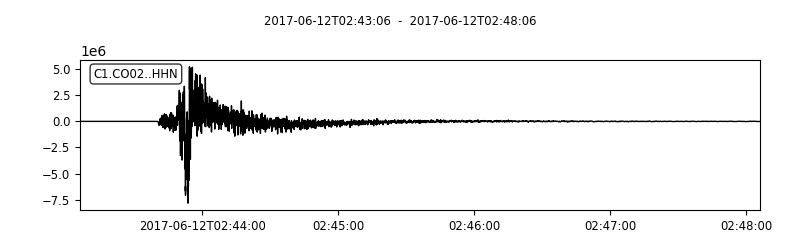

In [76]:
CO02_HHN.plot();

<IPython.core.display.Javascript object>


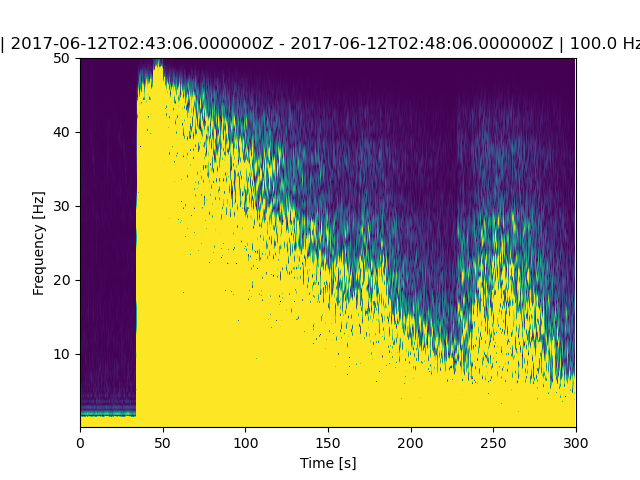

(4.1636906125464285e-06, 4952064.153721978)


In [80]:
fig = CO02_HHN[0].spectrogram(show=False)
ax  = fig.axes[0]
im  = ax.images[0]
print(im.get_clim())
im.set_clim(vmax = 100)
plt.show()